# Preprossesing 

The aim is to create a model for prodicting points for players in fpl. Since each position gets points based on different parameters, it is decided that one regression model is to be implemented for each position (GK, DEF, MID, FWD). As a result of this, info from different .csv-files must be fetched. Further more this allows for unneccesary coloumns to be removed (xG is not relevant for GK's in the same way that number fo saves os not relevant for FWD's). 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


### Test set
The test set consists of the final 15 games of the 2023-2024 season, about 20% of the dataset 

In [12]:
TEST_SET_GWS = 15 #final 15 GWs of 23-24 season is the test set
NUM_GWS = 38

### FWD data fetch
Creating the dataframe for forwards. This dataframe consists of all data from the last 5 games lagged for every player at every gameweek, as well as oponent-team data, The dataframes have 133 features and 5185 entries, given on the form:
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
        width: 0.5
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>total_points</th>
      <th>was_home</th>
      <th>attack_strenght_difference</th>
      <th>strength_difference</th>
      <th>xP_lag1</th>
      <th>xP_lag2</th>
      <th>xP_lag3</th>
      <th>xP_lag4</th>
      <th>xP_lag5</th>
      <th>assists_lag1</th>
      <th>...</th>
      <th>was_home_lag1</th>
      <th>was_home_lag2</th>
      <th>was_home_lag3</th>
      <th>was_home_lag4</th>
      <th>was_home_lag5</th>
      <th>yellow_cards_lag1</th>
      <th>yellow_cards_lag2</th>
      <th>yellow_cards_lag3</th>
      <th>yellow_cards_lag4</th>
      <th>yellow_cards_lag5</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>228</th>
      <td>0</td>
      <td>True</td>
      <td>-50.0</td>
      <td>1.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>...</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>866</th>
      <td>0</td>
      <td>False</td>
      <td>65.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>0.0</td>
      <td>...</td>
      <td>True</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>0.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1487</th>
      <td>0</td>
      <td>True</td>
      <td>-80.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>0.0</td>
      <td>...</td>
      <td>False</td>
      <td>True</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2178</th>
      <td>0</td>
      <td>True</td>
      <td>-285.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>0.0</td>
      <td>...</td>
      <td>True</td>
      <td>False</td>
      <td>True</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2884</th>
      <td>0</td>
      <td>False</td>
      <td>60.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>NaN</td>
      <td>0.0</td>
      <td>...</td>
      <td>True</td>
      <td>True</td>
      <td>False</td>
      <td>True</td>
      <td>NaN</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>12626</th>
      <td>2</td>
      <td>False</td>
      <td>-10.0</td>
      <td>-1.0</td>
      <td>3.3</td>
      <td>3.3</td>
      <td>3.7</td>
      <td>4.2</td>
      <td>1.5</td>
      <td>0.0</td>
      <td>...</td>
      <td>True</td>
      <td>False</td>
      <td>False</td>
      <td>True</td>
      <td>True</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>13365</th>
      <td>2</td>
      <td>True</td>
      <td>-340.0</td>
      <td>-2.0</td>
      <td>3.0</td>
      <td>3.3</td>
      <td>3.3</td>
      <td>3.7</td>
      <td>4.2</td>
      <td>0.0</td>
      <td>...</td>
      <td>False</td>
      <td>True</td>
      <td>False</td>
      <td>False</td>
      <td>True</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>14138</th>
      <td>7</td>
      <td>False</td>
      <td>-130.0</td>
      <td>-2.0</td>
      <td>2.5</td>
      <td>3.0</td>
      <td>3.3</td>
      <td>3.3</td>
      <td>3.7</td>
      <td>0.0</td>
      <td>...</td>
      <td>True</td>
      <td>False</td>
      <td>True</td>
      <td>False</td>
      <td>False</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>14919</th>
      <td>9</td>
      <td>True</td>
      <td>-70.0</td>
      <td>0.0</td>
      <td>2.3</td>
      <td>2.5</td>
      <td>3.0</td>
      <td>3.3</td>
      <td>3.3</td>
      <td>0.0</td>
      <td>...</td>
      <td>False</td>
      <td>True</td>
      <td>False</td>
      <td>True</td>
      <td>False</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>15712</th>
      <td>1</td>
      <td>False</td>
      <td>-310.0</td>
      <td>-3.0</td>
      <td>6.5</td>
      <td>2.3</td>
      <td>2.5</td>
      <td>3.0</td>
      <td>3.3</td>
      <td>0.0</td>
      <td>...</td>
      <td>True</td>
      <td>False</td>
      <td>True</td>
      <td>False</td>
      <td>True</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
  </tbody>
</table>
<p>5185 rows × 134 columns</p>
</div>   

In [13]:
def get_FWD_player_data() -> pd.DataFrame:
    """
    Get the data of all the FW players
    :return: data of all the FW players
    """
    FWD_cols = [
                'name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps', 
                'creativity', 'expected_assists', 'expected_goal_involvements', 
                'expected_goals', 'goals_scored', 'ict_index', 'influence', 'minutes', 
                'opponent_team', 'own_goals', 'penalties_missed', 'red_cards', 
                'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points', 
                'transfers_balance', 'transfers_in', 'transfers_out', 'value', 'was_home', 
                'yellow_cards', 'GW'
                ]
    
    # Getting data from 22/23 season    
    df_22_23 = pd.read_csv("../data/2022-23/gws/merged_gw.csv", usecols=FWD_cols)
    df_22_23['season'] = '2022-23'

    # Getting data from 23/24 season
    df_23_24 = pd.read_csv("../data/2023-24/gws/merged_gw.csv", usecols=FWD_cols)
    #excluding the test set
    df_23_24.drop(df_23_24[df_23_24['GW'] >= NUM_GWS-TEST_SET_GWS].index, inplace=True)
    df_23_24['season'] = '2023-24'
    
    # Merging the data
    df = pd.concat([df_22_23, df_23_24])

    # Filtering only the FWD players
    df = df[df['position'] == "FWD"]

    # Adding information about the opponent team, looking at strength differences
    team_info_cols = [
                     'id', 'name', 'strength', 'strength_attack_home', 'strength_attack_away', 
                     'strength_defence_home', 'strength_defence_away'
                     ]
    
    for index, row in df.iterrows():
        team_info_df = pd.read_csv(f"../data/{row['season']}/teams.csv", usecols=team_info_cols)
        if row['was_home']:
            df.at[index, 'attack_strenght_difference'] = team_info_df.loc[team_info_df['name'] == row['team'], 'strength_attack_home'].values[0] - team_info_df.loc[team_info_df['id'] == row['opponent_team'], 'strength_defence_away'].values[0]
        else:
            df.at[index, 'attack_strenght_difference'] = team_info_df.loc[team_info_df['name'] == row['team'], 'strength_attack_away'].values[0] - team_info_df.loc[team_info_df['id'] == row['opponent_team'], 'strength_defence_home'].values[0]
        
        df.at[index, 'strength_difference'] = team_info_df.loc[team_info_df['name'] == row['team'], 'strength'].values[0] - team_info_df.loc[team_info_df['id'] == row['opponent_team'], 'strength'].values[0]
    
    # Adding lagged features
    NUM_LAGS = 4
    lagged_features = [
                'xP', 'assists', 'bonus', 'bps', 'creativity', 
                'expected_assists', 'expected_goal_involvements', 
                'expected_goals', 'goals_scored', 'ict_index', 'influence', 
                'minutes', 'own_goals', 'penalties_missed', 'red_cards', 
                'selected', 'team_a_score', 'team_h_score', 'threat', 
                'total_points', 'transfers_balance', 'transfers_in', 
                'transfers_out', 'value', 
    ]

    df.sort_values(by=['name', 'season', 'GW'], ascending=[True, True, True], inplace=True)
    lagged_columns = {}

    for feature in lagged_features:
        for i in range(1, NUM_LAGS + 1):
            # Create a new column with lagged values
            lagged_columns[f'{feature}_lag{i}'] = df.groupby('name')[feature].shift(i)

    # Combine the original DataFrame with the new lagged features at once
    lagged_df = pd.DataFrame(lagged_columns)
    df = pd.concat([df, lagged_df], axis=1)

    # Removing coloumns with info about the future
    coloumns_to_remove = [
                'name', 'creativity', 'position', 'team', 'xP', 'assists', 'bonus', 'bps', 
                'expected_assists', 'expected_goal_involvements', 
                'expected_goals', 'goals_scored', 'ict_index', 'influence', 'minutes', 
                'opponent_team', 'own_goals', 'penalties_missed', 'red_cards', 
                'selected', 'team_a_score', 'team_h_score', 'threat', 
                'transfers_balance', 'transfers_in', 'transfers_out', 'value', 
                'yellow_cards', 'season', 'was_home'
                ]
    
    df.drop(coloumns_to_remove, axis=1, inplace=True)

    return df

In [14]:
df = get_FWD_player_data()

#### FWD data analasys
looking at correlation, removed the following: 'penalties_missed', 

In [15]:
correlation_with_total_points = df.corr()['total_points'].drop('total_points')

correlation_with_total_points = correlation_with_total_points.sort_values(ascending=False)

with pd.option_context('display.max_rows', None):
    print(correlation_with_total_points)


minutes_lag1                       0.482581
xP_lag1                            0.443154
minutes_lag2                       0.432056
xP_lag2                            0.416211
xP_lag3                            0.411235
ict_index_lag1                     0.403617
minutes_lag4                       0.399367
minutes_lag3                       0.389585
xP_lag4                            0.384464
threat_lag1                        0.381972
ict_index_lag2                     0.370423
total_points_lag1                  0.367845
threat_lag2                        0.352659
ict_index_lag4                     0.347042
ict_index_lag3                     0.345483
total_points_lag3                  0.337503
value_lag1                         0.336271
selected_lag1                      0.335181
value_lag2                         0.334657
value_lag3                         0.333888
influence_lag1                     0.333277
total_points_lag2                  0.329573
value_lag4                      

In [16]:
# printing all the features
for column in df.columns:
    print(column)

total_points
GW
attack_strenght_difference
strength_difference
xP_lag1
xP_lag2
xP_lag3
xP_lag4
assists_lag1
assists_lag2
assists_lag3
assists_lag4
bonus_lag1
bonus_lag2
bonus_lag3
bonus_lag4
bps_lag1
bps_lag2
bps_lag3
bps_lag4
creativity_lag1
creativity_lag2
creativity_lag3
creativity_lag4
expected_assists_lag1
expected_assists_lag2
expected_assists_lag3
expected_assists_lag4
expected_goal_involvements_lag1
expected_goal_involvements_lag2
expected_goal_involvements_lag3
expected_goal_involvements_lag4
expected_goals_lag1
expected_goals_lag2
expected_goals_lag3
expected_goals_lag4
goals_scored_lag1
goals_scored_lag2
goals_scored_lag3
goals_scored_lag4
ict_index_lag1
ict_index_lag2
ict_index_lag3
ict_index_lag4
influence_lag1
influence_lag2
influence_lag3
influence_lag4
minutes_lag1
minutes_lag2
minutes_lag3
minutes_lag4
own_goals_lag1
own_goals_lag2
own_goals_lag3
own_goals_lag4
penalties_missed_lag1
penalties_missed_lag2
penalties_missed_lag3
penalties_missed_lag4
red_cards_lag1
red_ca

### Using Random Forest on FWD


Mean Squared Error: 0.8295188444009188
R-squared: 0.8831991135491366


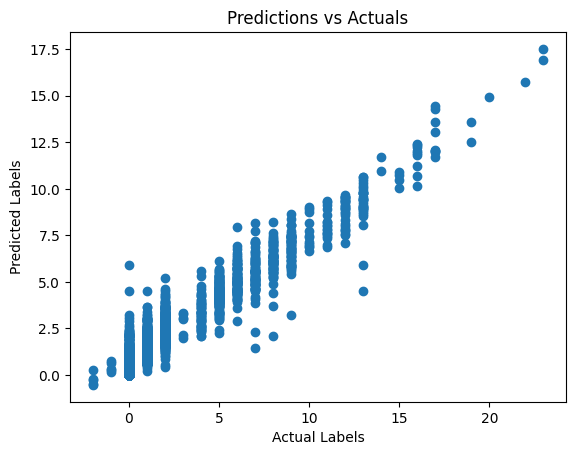

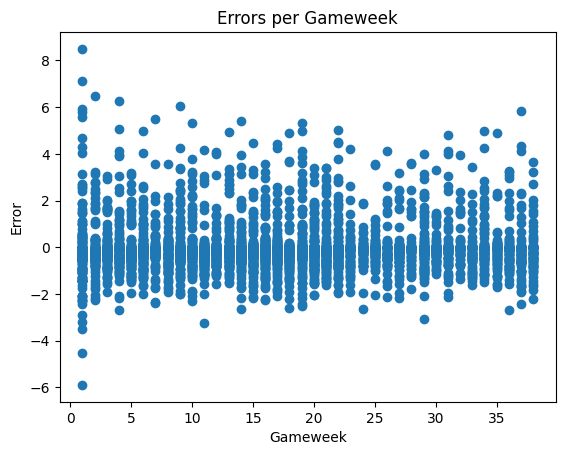

In [17]:
# Separating out the features and target
Y = df['total_points'].values
X = df.drop(['total_points'], axis=1).values

# Fitting Random Forest Regression to the dataset
regressor_FWD = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
regressor_FWD.fit(X, Y)

# Making predictions on the same data or new data
predictions = regressor_FWD.predict(X)
 
# Evaluating the model
mse = mean_squared_error(Y, predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(Y, predictions)
print(f'R-squared: {r2}')

#Plot predicted vs actual
plt.scatter(Y, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
plt.show()


# Plotting errors per gameweek, want to visualize the amout of ovwerlapping errors
errors = Y - predictions
plt.scatter(df['GW'], errors)
plt.xlabel('Gameweek')
plt.ylabel('Error')
plt.title('Errors per Gameweek')
plt.show()

### Creating a model for MID players

In [18]:
def get_MID_player_data() -> pd.DataFrame:
    """
    Get the data of all the MID players
    :return: data of all the MID players
    """
    MID_cols = [
                'name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps', 'clean_sheets', 
                'creativity', 'expected_assists', 'expected_goal_involvements', 
                'expected_goals','expected_goals_conceded', 'goals_scored', 'ict_index', 'influence', 'minutes', 
                'opponent_team', 'own_goals', 'penalties_missed', 'red_cards', 
                'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points', 
                'transfers_balance', 'transfers_in', 'transfers_out', 'value', 'was_home', 
                'yellow_cards', 'GW'
                ]
    
    
    # Getting data from 22/23 season    
    df_22_23 = pd.read_csv("../data/2022-23/gws/merged_gw.csv", usecols=MID_cols)
    df_22_23['season'] = '2022-23'

    # Getting data from 23/24 season
    df_23_24 = pd.read_csv("../data/2023-24/gws/merged_gw.csv", usecols=MID_cols)
    #excluding the test set
    df_23_24.drop(df_23_24[df_23_24['GW'] >= NUM_GWS-TEST_SET_GWS].index, inplace=True)
    df_23_24['season'] = '2023-24'
    
    # Merging the data
    df = pd.concat([df_22_23, df_23_24])

    # Filtering only the FWD players
    df = df[df['position'] == "MID"]

    # Adding information about the opponent team, looking at strength differences
    team_info_cols = [
                     'id', 'name', 'strength', 'strength_attack_home', 'strength_attack_away', 
                     'strength_defence_home', 'strength_defence_away'
                     ]
    
    for index, row in df.iterrows():
        team_info_df = pd.read_csv(f"../data/{row['season']}/teams.csv", usecols=team_info_cols)
        if row['was_home']:
            df.at[index, 'attack_strenght_difference'] = team_info_df.loc[team_info_df['name'] == row['team'], 'strength_attack_home'].values[0] - team_info_df.loc[team_info_df['id'] == row['opponent_team'], 'strength_defence_away'].values[0]
        else:
            df.at[index, 'attack_strenght_difference'] = team_info_df.loc[team_info_df['name'] == row['team'], 'strength_attack_away'].values[0] - team_info_df.loc[team_info_df['id'] == row['opponent_team'], 'strength_defence_home'].values[0]
        
        df.at[index, 'strength_difference'] = team_info_df.loc[team_info_df['name'] == row['team'], 'strength'].values[0] - team_info_df.loc[team_info_df['id'] == row['opponent_team'], 'strength'].values[0]
    
    # Adding lagged features
    NUM_LAGS = 5
    lagged_features = [
                'xP', 'assists', 'bonus', 'bps', 'clean_sheets','creativity', 
                'expected_assists', 'expected_goal_involvements', 
                'expected_goals', 'expected_goals_conceded', 'goals_scored', 'ict_index', 'influence', 
                'minutes', 'own_goals', 'penalties_missed', 'red_cards', 
                'selected', 'team_a_score', 'team_h_score', 'threat', 
                'total_points', 'transfers_balance', 'transfers_in', 
                'transfers_out', 'value', 'was_home', 'yellow_cards'
    ]

    df.sort_values(by=['name', 'season', 'GW'], ascending=[True, True, True], inplace=True)
    lagged_columns = {}

    for feature in lagged_features:
        for i in range(1, NUM_LAGS + 1):
            # Create a new column with lagged values
            lagged_columns[f'{feature}_lag{i}'] = df.groupby('name')[feature].shift(i)

    # Combine the original DataFrame with the new lagged features at once
    lagged_df = pd.DataFrame(lagged_columns)
    df = pd.concat([df, lagged_df], axis=1)

    # Removing coloumns with info about the future
    coloumns_to_remove = [
                'name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps', 
                'creativity', 'expected_assists', 'expected_goal_involvements', 
                'expected_goals', 'goals_scored', 'ict_index', 'influence', 'minutes', 
                'opponent_team', 'own_goals', 'penalties_missed', 'red_cards', 
                'selected', 'team_a_score', 'team_h_score', 'threat', 
                'transfers_balance', 'transfers_in', 'transfers_out', 'value', 
                'yellow_cards', 'GW', 'season'
                ]
    
    df.drop(coloumns_to_remove, axis=1, inplace=True)

    return df

In [19]:
df_mid = get_MID_player_data()

### Using Random Forest on MIDs

In [20]:
# Separating out the features and target
Y = df_mid['total_points'].values
X = df_mid.drop(['total_points'], axis=1).values

# Fitting Random Forest Regression to the dataset
regressor_MID = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
regressor_MID.fit(X, Y)

# Making predictions on the same data or new data
predictions = regressor_MID.predict(X)
 
# Evaluating the model
mse = mean_squared_error(Y, predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(Y, predictions)
print(f'R-squared: {r2}')

Mean Squared Error: 0.507069129762074
R-squared: 0.9085452319816547


### Creating a Model for DEF players

In [21]:
def get_DEF_player_data() -> pd.DataFrame:
    """
    Get the data of all the MID players
    :return: data of all the MID players
    """
    DEF_cols = [
                'name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps', 'clean_sheets', 
                'creativity', 'expected_assists', 'expected_goal_involvements', 
                'expected_goals','expected_goals_conceded', 'goals_scored', 'ict_index', 'influence', 'minutes', 
                'opponent_team', 'own_goals', 'penalties_missed', 'red_cards', 
                'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points', 
                'transfers_balance', 'transfers_in', 'transfers_out', 'value', 'was_home', 
                'yellow_cards', 'GW'
                ]
    
    
    # Getting data from 22/23 season    
    df_22_23 = pd.read_csv("../data/2022-23/gws/merged_gw.csv", usecols=DEF_cols)
    df_22_23['season'] = '2022-23'

    # Getting data from 23/24 season
    df_23_24 = pd.read_csv("../data/2023-24/gws/merged_gw.csv", usecols=DEF_cols)
    #excluding the test set
    df_23_24.drop(df_23_24[df_23_24['GW'] >= NUM_GWS-TEST_SET_GWS].index, inplace=True)
    df_23_24['season'] = '2023-24'
    
    # Merging the data
    df = pd.concat([df_22_23, df_23_24])

    # Filtering only the FWD players
    df = df[df['position'] == "DEF"]

    # Adding information about the opponent team, looking at strength differences
    team_info_cols = [
                     'id', 'name', 'strength', 'strength_attack_home', 'strength_attack_away', 
                     'strength_defence_home', 'strength_defence_away'
                     ]
    
    for index, row in df.iterrows():
        team_info_df = pd.read_csv(f"../data/{row['season']}/teams.csv", usecols=team_info_cols)
        if row['was_home']:
            df.at[index, 'defence_strenght_difference'] = team_info_df.loc[team_info_df['name'] == row['team'], 'strength_defence_home'].values[0] - team_info_df.loc[team_info_df['id'] == row['opponent_team'], 'strength_attack_away'].values[0]
        else:
            df.at[index, 'defence_strenght_difference'] = team_info_df.loc[team_info_df['name'] == row['team'], 'strength_defence_away'].values[0] - team_info_df.loc[team_info_df['id'] == row['opponent_team'], 'strength_attack_home'].values[0]
        
        df.at[index, 'strength_difference'] = team_info_df.loc[team_info_df['name'] == row['team'], 'strength'].values[0] - team_info_df.loc[team_info_df['id'] == row['opponent_team'], 'strength'].values[0]
    
    # Adding lagged features
    NUM_LAGS = 5
    lagged_features = [
                'xP', 'assists', 'bonus', 'bps', 'clean_sheets','creativity', 
                'expected_assists', 'expected_goal_involvements', 
                'expected_goals', 'expected_goals_conceded', 'goals_scored', 'ict_index', 'influence', 
                'minutes', 'own_goals', 'penalties_missed', 'red_cards', 
                'selected', 'team_a_score', 'team_h_score', 'threat', 
                'total_points', 'transfers_balance', 'transfers_in', 
                'transfers_out', 'value', 'was_home', 'yellow_cards'
    ]

    df.sort_values(by=['name', 'season', 'GW'], ascending=[True, True, True], inplace=True)
    lagged_columns = {}

    for feature in lagged_features:
        for i in range(1, NUM_LAGS + 1):
            # Create a new column with lagged values
            lagged_columns[f'{feature}_lag{i}'] = df.groupby('name')[feature].shift(i)

    # Combine the original DataFrame with the new lagged features at once
    lagged_df = pd.DataFrame(lagged_columns)
    df = pd.concat([df, lagged_df], axis=1)

    # Removing coloumns with info about the future
    coloumns_to_remove = [
                'name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps', 'clean_sheets', 
                'creativity', 'expected_assists', 'expected_goal_involvements', 
                'expected_goals','expected_goals_conceded', 'goals_scored', 'ict_index', 'influence', 'minutes', 'own_goals', 
                'penalties_missed', 'red_cards', 'team_a_score', 'team_h_score', 'threat', 'opponent_team', 
                'transfers_balance', 'transfers_in', 'transfers_out', 'value', 
                'yellow_cards', 'GW', 'season'
                ]
    
    df.drop(coloumns_to_remove, axis=1, inplace=True)

    return df

In [22]:
df_def = get_DEF_player_data()

In [23]:
# Separating out the features and target
Y = df_def['total_points'].values
X = df_def.drop(['total_points'], axis=1).values

# Fitting Random Forest Regression to the dataset
regressor_DEF = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
regressor_DEF.fit(X, Y)

# Making predictions on the same data or new data
predictions = regressor_DEF.predict(X)
 
# Evaluating the model
mse = mean_squared_error(Y, predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(Y, predictions)
print(f'R-squared: {r2}')

Mean Squared Error: 0.5471969303423848
R-squared: 0.8920319476578603


### Creating a Model for GK

In [24]:
def get_GK_player_data() -> pd.DataFrame:
    """
    Get the data of all the MID players
    :return: data of all the MID players
    """
    GK_cols = [
                'name', 'position', 'team', 'xP', 'bonus', 'bps', 'clean_sheets',  
                'expected_goals_conceded', 'ict_index', 'influence', 'minutes', 
                'opponent_team', 'own_goals', 'red_cards', 'saves',
                'selected', 'team_a_score', 'team_h_score', 'total_points', 
                'transfers_balance', 'transfers_in', 'transfers_out', 'value', 'was_home', 
                'yellow_cards', 'GW'
                ]
    
    
    # Getting data from 22/23 season    
    df_22_23 = pd.read_csv("../data/2022-23/gws/merged_gw.csv", usecols=GK_cols)
    df_22_23['season'] = '2022-23'

    # Getting data from 23/24 season
    df_23_24 = pd.read_csv("../data/2023-24/gws/merged_gw.csv", usecols=GK_cols)
    #excluding the test set
    df_23_24.drop(df_23_24[df_23_24['GW'] >= NUM_GWS-TEST_SET_GWS].index, inplace=True)
    df_23_24['season'] = '2023-24'
    
    # Merging the data
    df = pd.concat([df_22_23, df_23_24])

    # Filtering only the FWD players
    df = df[df['position'] == "GK"]

    # Adding information about the opponent team, looking at strength differences
    team_info_cols = [
                     'id', 'name', 'strength', 'strength_attack_home', 'strength_attack_away', 
                     'strength_defence_home', 'strength_defence_away'
                     ]
    
    for index, row in df.iterrows():
        team_info_df = pd.read_csv(f"../data/{row['season']}/teams.csv", usecols=team_info_cols)
        if row['was_home']:
            df.at[index, 'defence_strenght_difference'] = team_info_df.loc[team_info_df['name'] == row['team'], 'strength_defence_home'].values[0] - team_info_df.loc[team_info_df['id'] == row['opponent_team'], 'strength_attack_away'].values[0]
        else:
            df.at[index, 'defence_strenght_difference'] = team_info_df.loc[team_info_df['name'] == row['team'], 'strength_defence_away'].values[0] - team_info_df.loc[team_info_df['id'] == row['opponent_team'], 'strength_attack_home'].values[0]
        
        df.at[index, 'strength_difference'] = team_info_df.loc[team_info_df['name'] == row['team'], 'strength'].values[0] - team_info_df.loc[team_info_df['id'] == row['opponent_team'], 'strength'].values[0]
    
    # Adding lagged features
    NUM_LAGS = 5
    lagged_features = [
                'xP', 'bonus', 'bps', 'clean_sheets', 
                'expected_goals_conceded', 'ict_index', 'influence', 
                'minutes', 'own_goals', 'red_cards', 'saves',
                'selected', 'team_a_score', 'team_h_score', 
                'total_points', 'transfers_balance', 'transfers_in', 
                'transfers_out', 'value', 'was_home', 'yellow_cards'
    ]

    df.sort_values(by=['name', 'season', 'GW'], ascending=[True, True, True], inplace=True)
    lagged_columns = {}

    for feature in lagged_features:
        for i in range(1, NUM_LAGS + 1):
            # Create a new column with lagged values
            lagged_columns[f'{feature}_lag{i}'] = df.groupby('name')[feature].shift(i)

    # Combine the original DataFrame with the new lagged features at once
    lagged_df = pd.DataFrame(lagged_columns)
    df = pd.concat([df, lagged_df], axis=1)

    # Removing coloumns with info about the future
    coloumns_to_remove = [
                'name', 'position', 'team', 'xP', 'bonus', 'bps', 'clean_sheets',  
                'expected_goals_conceded', 'ict_index', 'influence', 'minutes', 
                'opponent_team', 'own_goals', 'red_cards', 'saves',
                'selected', 'team_a_score', 'team_h_score', 
                'transfers_balance', 'transfers_in', 'transfers_out', 'value', 'was_home', 
                'yellow_cards', 'GW', 'season'
                ]
    
    df.drop(coloumns_to_remove, axis=1, inplace=True)

    return df

In [25]:
df_gk = get_GK_player_data()

In [26]:
# Separating out the features and target
Y = df_gk['total_points'].values
X = df_gk.drop(['total_points'], axis=1).values

# Fitting Random Forest Regression to the dataset
regressor_GK = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True)

# Fit the regressor with x and y data
regressor_GK.fit(X, Y)

# Making predictions on the same data or new data
predictions = regressor_GK.predict(X)

# Evaluating the model
mse = mean_squared_error(Y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(Y, predictions)
print(f'R-squared: {r2}')

Mean Squared Error: 0.43319406501119817
R-squared: 0.9038801745804679


In [27]:
## PRINTING EVERY DATAFEATURE PER POSITION
print("\n ------------ \n FWD")
for column in df.columns:
    print(column)

print("\n ------------ \n MID")
for column in df_mid.columns:
    print(column)

print("\n ------------ \n DEF")
for column in df_def.columns:
    print(column)

print("\n ------------ \n GK")
for column in df_gk.columns:
    print(column)



 ------------ 
 FWD
total_points
GW
attack_strenght_difference
strength_difference
xP_lag1
xP_lag2
xP_lag3
xP_lag4
assists_lag1
assists_lag2
assists_lag3
assists_lag4
bonus_lag1
bonus_lag2
bonus_lag3
bonus_lag4
bps_lag1
bps_lag2
bps_lag3
bps_lag4
creativity_lag1
creativity_lag2
creativity_lag3
creativity_lag4
expected_assists_lag1
expected_assists_lag2
expected_assists_lag3
expected_assists_lag4
expected_goal_involvements_lag1
expected_goal_involvements_lag2
expected_goal_involvements_lag3
expected_goal_involvements_lag4
expected_goals_lag1
expected_goals_lag2
expected_goals_lag3
expected_goals_lag4
goals_scored_lag1
goals_scored_lag2
goals_scored_lag3
goals_scored_lag4
ict_index_lag1
ict_index_lag2
ict_index_lag3
ict_index_lag4
influence_lag1
influence_lag2
influence_lag3
influence_lag4
minutes_lag1
minutes_lag2
minutes_lag3
minutes_lag4
own_goals_lag1
own_goals_lag2
own_goals_lag3
own_goals_lag4
penalties_missed_lag1
penalties_missed_lag2
penalties_missed_lag3
penalties_missed_lag4
